In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
plt.style.use('dark_background')

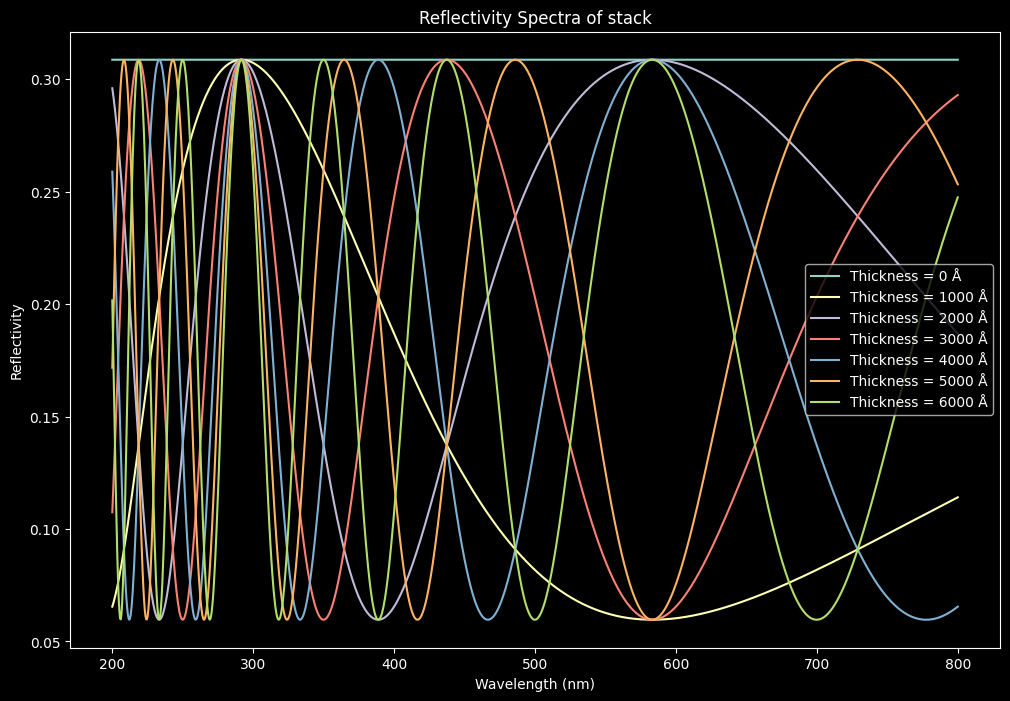

In [4]:

# wavelength range (in nm) from 500 to 800, resolution 0.5 nm
wavelengths = np.arange(200, 800.5, 0.5)

# Cauchy's equation coefficients (defined for any material)
A = 1.458
B = 0.00354

# quantify refractive index (n) 
n_thin_film = A + B / wavelengths**2

# Refractive index for base material (constant for simplicity)
n_si = 3.5

# air
n_air = 1.0

# Reflectivity using the transfer matrix method to account for interference and multiple reflections
def transfer_matrix_reflectivity(n_air, n_thin_film, n_silicon, thickness, wavelengths):
    # Å to nm
    thickness_nm = thickness * 1e-1
    
    # phase change on reflection
    delta = (2 * np.pi / wavelengths) * n_thin_film * thickness_nm
    
    # reflectivity using transfer matrix method
    r01 = (n_air - n_thin_film) / (n_air + n_thin_film)
    r12 = (n_thin_film - n_silicon) / (n_thin_film + n_silicon)
    
    R = np.abs((r01 + r12 * np.exp(-2j * delta)) / (1 + r01 * r12 * np.exp(-2j * delta)))**2
    return R

# Initialize arrays to store reflectivity spectra for different thicknesses
thicknesses = np.arange(0, 6001, 1)  # Thickness range from 0 Å to 6000 Å in steps of 1 Å
reflectivity_spectra = np.zeros((len(thicknesses), len(wavelengths)))

# Calculate reflectivity spectra for each thickness
for i, thickness in enumerate(thicknesses):
    reflectivity_spectra[i, :] = transfer_matrix_reflectivity(n_air, n_thin_film, n_si, thickness, wavelengths)

# reflectivity spectra for selected thicknesses
plt.figure(figsize=(12, 8))
for i in range(0, len(thicknesses), 1000):  # Plot every 1000 Å step for clarity
    plt.plot(wavelengths, reflectivity_spectra[i, :], label=f'Thickness = {thicknesses[i]} Å')

plt.xlabel('Wavelength (nm)')
plt.ylabel('Reflectivity')
plt.title('Reflectivity Spectra of stack')
plt.legend()
plt.show()